In [1]:
from polygon import RESTClient
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
import plotly.graph_objects as go
import constants as c
sb.set()

In [2]:
client = RESTClient(api_key=c.POLY_APIKEY)

In [3]:
ticker = "AAPL"

# List Aggregates (Bars)
bars = client.get_aggs(ticker=ticker, multiplier=1, timespan="day", from_="2022-01-09", to="2023-01-10")
df = pd.DataFrame(bars)
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df['change'] = df['close'] - df['open']
# df

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

df


,open,high,low,close,volume,vwap,timestamp,transactions,otc,date,change
0,169.080,172.5000,168.17,172.19,106754551.0,170.2886,1641790800000,956337,None,2022-01-10 05:00:00,3.110
1,172.320,175.1800,170.82,175.08,76138312.0,173.6337,1641877200000,649652,None,2022-01-11 05:00:00,2.760
2,176.120,177.1800,174.82,175.53,74805173.0,175.8343,1641963600000,642756,None,2022-01-12 05:00:00,-0.590
3,175.780,176.6200,171.79,172.19,84405760.0,173.9711,1642050000000,692343,None,2022-01-13 05:00:00,-3.590
4,171.340,173.7800,171.09,173.07,80440778.0,172.3612,1642136400000,672552,None,2022-01-14 05:00:00,1.730
...,...,...,...,...,...,...,...,...,...,...,...
247,126.890,128.6557,125.08,126.36,89100633.0,126.6464,1672808400000,770042,None,2023-01-04 05:00:00,-0.530
248,127.130,127.7700,124.76,125.02,80716808.0,126.0883,1672894800000,665458,None,2023-01-05 05:00:00,-2.110
249,126.010,130.2900,124.89,129.62,87754715.0,128.1982,1672981200000,711520,None,2023-01-06 05:00:00,3.610
250,130.465,133.4100,129.89,130.15,70790813.0,131.6292,1673240400000,645365,None,2023-01-09 05:00:00,-0.315


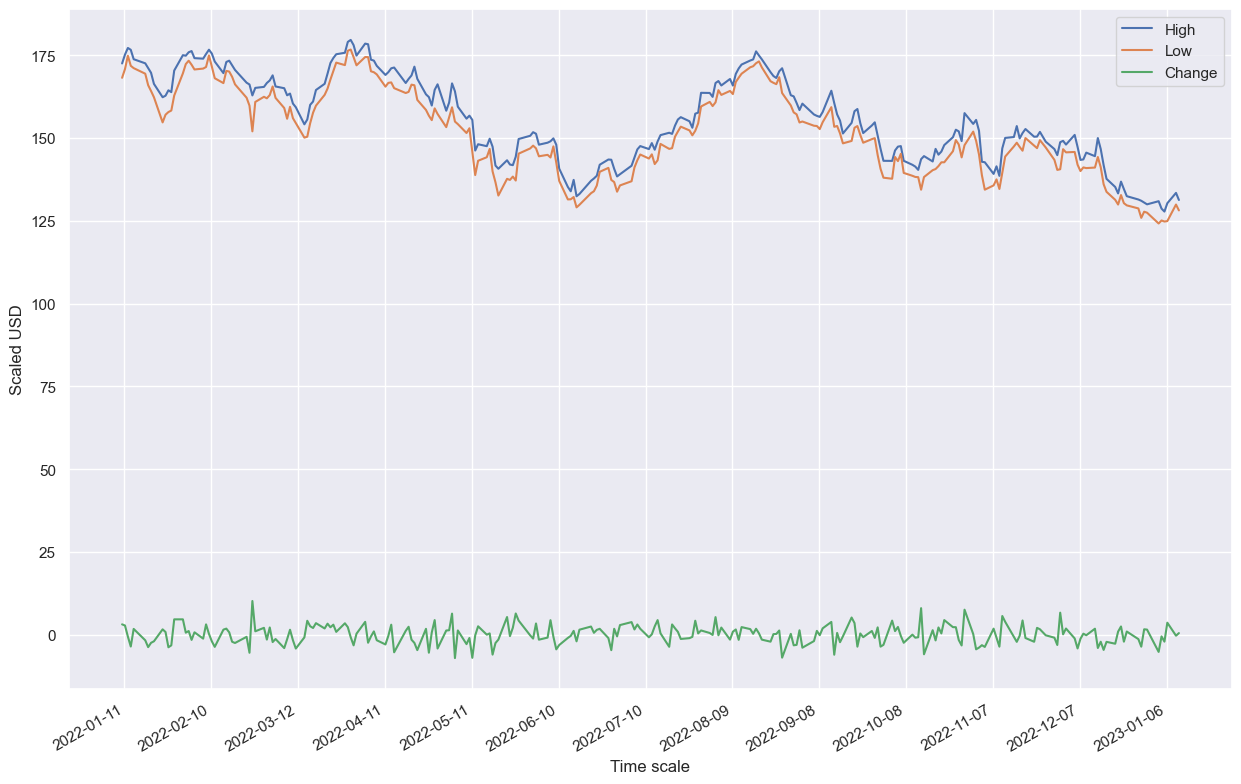

In [4]:
# Plot graph
df.set_index('date')
plt.figure(figsize=(15, 10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
x_dates = df['date']

plt.plot(x_dates, df['high'], label='High')
plt.plot(x_dates, df['low'], label='Low')
plt.plot(x_dates, df['change'], label='Change')
plt.xlabel('Time scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# Build LSTM model from dataset
Dataset: AAPL stock price from 10 Jan 2022 to 10 Jan 2023

In [5]:
# Import relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


2023-03-09 14:39:32.327211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Reset index
df1=df.reset_index()['close']
df1

0      172.19
1      175.08
2      175.53
3      172.19
4      173.07
        ...  
247    126.36
248    125.02
249    129.62
250    130.15
251    130.73
Name: close, Length: 252, dtype: float64

In [7]:
# Transform values from 0 to 1
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[8.74490174e-01],
       [9.28068224e-01],
       [9.36410827e-01],
       [8.74490174e-01],
       [8.90804598e-01],
       [8.30181683e-01],
       [7.63997034e-01],
       [7.32109752e-01],
       [6.93177605e-01],
       [6.78531702e-01],
       [6.44419726e-01],
       [6.42751205e-01],
       [6.34037820e-01],
       [8.40007416e-01],
       [9.22506489e-01],
       [9.19354839e-01],
       [9.42157953e-01],
       [8.87652948e-01],
       [8.78197998e-01],
       [8.64664442e-01],
       [9.23433445e-01],
       [9.50315165e-01],
       [8.73192436e-01],
       [8.08676307e-01],
       [8.13125695e-01],
       [8.85613645e-01],
       [8.81164257e-01],
       [8.13125695e-01],
       [7.83833890e-01],
       [7.28587319e-01],
       [6.49796070e-01],
       [6.99295514e-01],
       [7.38413052e-01],
       [7.43418613e-01],
       [7.07823508e-01],
       [7.70114943e-01],
       [7.63997034e-01],
       [7.07267334e-01],
       [6.35520949e-01],
       [6.01038191e-01],


In [8]:
# Train test split (65%)
# Do not use random!
training_size = int(len(df1) * 0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]
test_data

array([[0.57081943],
       [0.54708936],
       [0.5736003 ],
       [0.54579162],
       [0.59974045],
       [0.7120875 ],
       [0.53429737],
       [0.56154987],
       [0.50704486],
       [0.47608454],
       [0.5461624 ],
       [0.59102707],
       [0.53207267],
       [0.51390434],
       [0.47107898],
       [0.47738228],
       [0.495736  ],
       [0.4601409 ],
       [0.32369299],
       [0.24434557],
       [0.32313682],
       [0.3908046 ],
       [0.39636633],
       [0.37838339],
       [0.2793845 ],
       [0.28550241],
       [0.25880608],
       [0.24694105],
       [0.33314794],
       [0.24768261],
       [0.32239525],
       [0.34723767],
       [0.34927697],
       [0.34056359],
       [0.41249537],
       [0.45291064],
       [0.50648869],
       [0.45105673],
       [0.36670374],
       [0.56952169],
       [0.52502781],
       [0.47515758],
       [0.37096774],
       [0.25695217],
       [0.24768261],
       [0.25769373],
       [0.26844642],
       [0.182

## Data preprocessing
Predict price of stock in a dat based on prev data


In [9]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []

    for i in range(len(dataset) - time_step - 1):
        # print(dataset[i:(i+time_step), 0])
        # print(dataset[i+time_step, 0])
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i+time_step, 0])
    
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_test

array([[0.57081943, 0.54708936, 0.5736003 , 0.54579162, 0.59974045,
        0.7120875 , 0.53429737, 0.56154987, 0.50704486, 0.47608454],
       [0.54708936, 0.5736003 , 0.54579162, 0.59974045, 0.7120875 ,
        0.53429737, 0.56154987, 0.50704486, 0.47608454, 0.5461624 ],
       [0.5736003 , 0.54579162, 0.59974045, 0.7120875 , 0.53429737,
        0.56154987, 0.50704486, 0.47608454, 0.5461624 , 0.59102707],
       [0.54579162, 0.59974045, 0.7120875 , 0.53429737, 0.56154987,
        0.50704486, 0.47608454, 0.5461624 , 0.59102707, 0.53207267],
       [0.59974045, 0.7120875 , 0.53429737, 0.56154987, 0.50704486,
        0.47608454, 0.5461624 , 0.59102707, 0.53207267, 0.51390434],
       [0.7120875 , 0.53429737, 0.56154987, 0.50704486, 0.47608454,
        0.5461624 , 0.59102707, 0.53207267, 0.51390434, 0.47107898],
       [0.53429737, 0.56154987, 0.50704486, 0.47608454, 0.5461624 ,
        0.59102707, 0.53207267, 0.51390434, 0.47107898, 0.47738228],
       [0.56154987, 0.50704486, 0.4760845

In [10]:
# Reshape X_train in 3-D (check that both arrays are not empty first)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2023-03-09 14:39:45.042621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

3/3 [==============================] - 0s 5ms/step


In [13]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

124.27000203144188

In [14]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 0)

ValueError: x and y must have same first dimension, but have shapes (1,) and (152, 1)

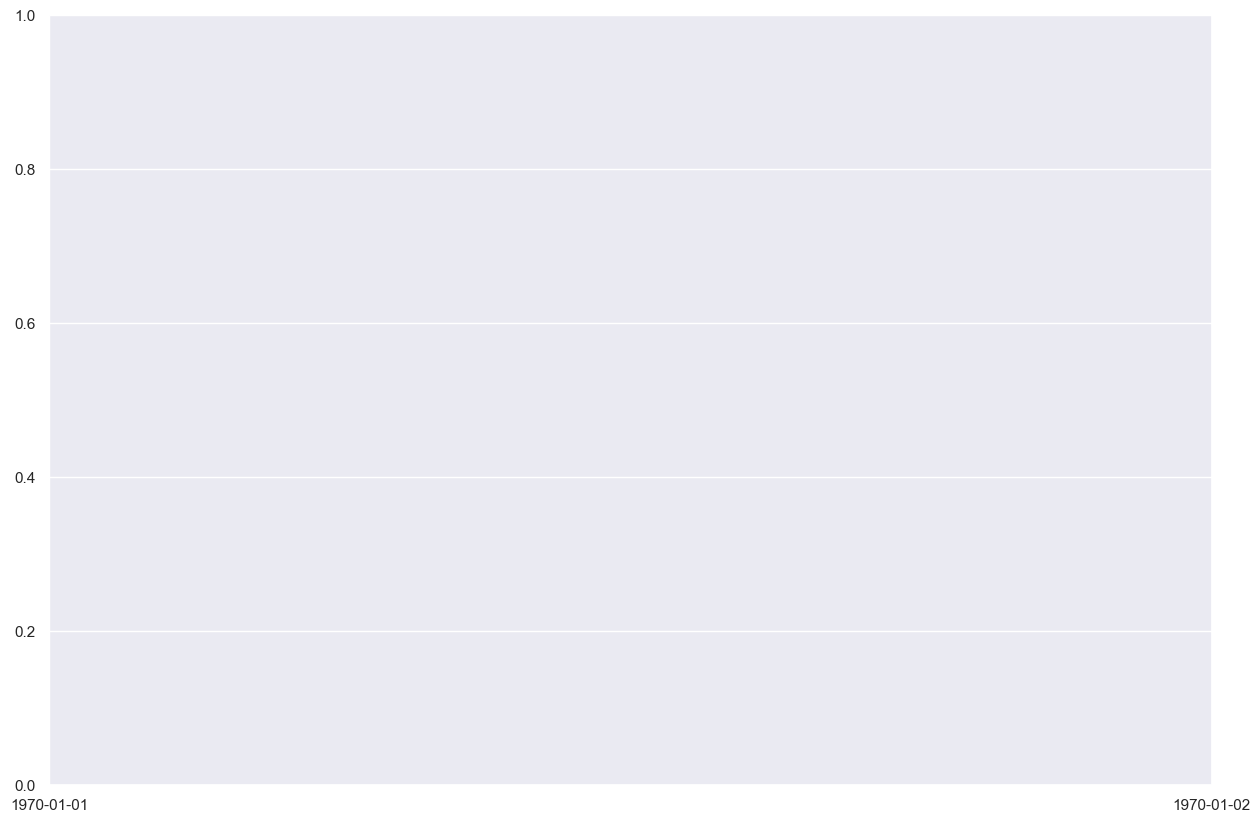

In [20]:
# Plot graph of train vs test
df.set_index('date')
plt.figure(figsize=(15, 10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
x_dates = df['date']

plt.plot(x_dates, train_predict, label='Train')
# plt.plot(x_dates, df['change'], label='Test')
plt.xlabel('Time scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()